# Linear Regression
Many data science enthusiasts want to jump right into Deep Learning using techniques like neural networks. While these models have a purpose, many times, a straightforward Linear Regression performs on par with these methods (and sometimes, _even better_).

<div>
<img src="../images/IMG_17571.PNG" width="450"/>
</div>

In this lab, we showcase the standard data science pipeline, where we do some light Exploratory Data Analysis, feature engineering, and model building and evaluation. We will use one of the datasets shipped with Scikit-Learn - the California Housing Dataset. 

For more detail, the dataset is described in the [documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

* MedInc median income in block group
* HouseAge median house age in block group
* AveRooms average number of rooms per household
* AveBedrms average number of bedrooms per household
* Population block group population
* AveOccup average number of household members
* Latitude block group latitude
* Longitude block group longitude

## Background
Linear Regressions try to find a relationship between inputs (i.e. independent variables, regressors, features) and outputs (i.e. dependent variables, responses). Here, we want to try to find a relationship between inputs like median income, rooms within a house, number of bedrooms in a house, etc. and the house price. This will allow us to create an equation to predict the house price given some input features.

Linear Regressions ultimately take on the form: $y = mX + b + \epsilon$, where: 
* $y$ is the house price
* $X$ are the input features
* $m$ is the slope of the line
* $b$ is the intercept
* $\epsilon$ is some error in the model

At the core of the model, Linear Regressions try to solve the classic problem we've previously learned in other Math classes: how do we find the best values of the slope and intercepts from a dataset that minimize error?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn import datasets

In [10]:
X, y = datasets.fetch_california_housing(as_frame=True, return_X_y=True)

In [27]:
# all features present in our dataset
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
# house value in units of 100k. So 4.52 means $452k valuation
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

# Visualize Data

It is important to actually visualize your data before we start building any models. This helps us understand if there are any relationships in the data we want to exploit, or if the assumptions of our models might be incorrect.

Let's start with some histograms to visualize how the values of each feature varies.

Text(0.5, 0, 'Longitude')

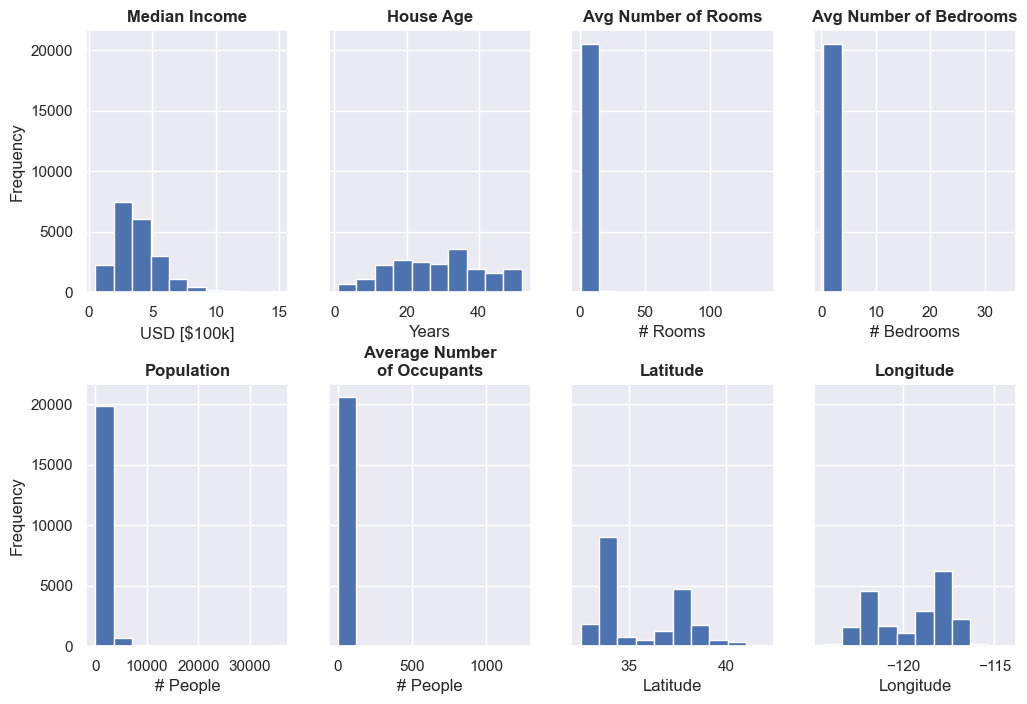

In [103]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(12,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

ax[0, 0].hist(X['MedInc'])
ax[0, 0].set_title('Median Income', weight='bold')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlabel('USD [$100k]')

ax[0, 1].hist(X['HouseAge'])
ax[0, 1].set_title('House Age', weight='bold')
ax[0, 1].set_ylabel('')
ax[0, 1].set_xlabel('Years')

ax[0, 2].hist(X['AveRooms'])
ax[0, 2].set_title('Avg Number of Rooms', weight='bold')
ax[0, 2].set_ylabel('')
ax[0, 2].set_xlabel('# Rooms')

ax[0, 3].hist(X['AveBedrms'])
ax[0, 3].set_title('Avg Number of Bedrooms', weight='bold')
ax[0, 3].set_ylabel('')
ax[0, 3].set_xlabel('# Bedrooms')

ax[1, 0].hist(X['Population'])
ax[1, 0].set_title('Population', weight='bold')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xlabel('# People')

ax[1, 1].hist(X['AveOccup'])
ax[1, 1].set_title('Average Number\nof Occupants', weight='bold')
ax[1, 1].set_ylabel('')
ax[1, 1].set_xlabel('# People')

ax[1, 2].hist(X['Latitude'])
ax[1, 2].set_title('Latitude', weight='bold')
ax[1, 2].set_ylabel('')
ax[1, 2].set_xlabel('Latitude')

ax[1, 3].hist(X['Longitude'])
ax[1, 3].set_title('Longitude', weight='bold')
ax[1, 3].set_xlabel('Longitude')

In [60]:
X['AveRooms'].mean(), X['AveRooms'].max()

(5.428999742190376, 141.9090909090909)

In [61]:
X['MedInc'].mean(), X['Population'].max()

(3.8706710029069766, 35682.0)

There are a few key things to notice on this graph. 

Notice we keep the y-axis range the same across all subplots using the `sharey=False` command. This allows us to easily compare frequency distributions between features. It becomes easy to see that columns like `AveRooms`, `AveBedrms`, `Population` and `AveOccup` have really strong outliers, which mean that a few examples are very different from the majority of the examples. Take for instance, `AveRooms`, which has a mean of 5.42 rooms, but a max of 141.9 rooms. We can experiment if filtering out these statistical outliers will improve the performance of our models.

Another subtle point to notice is that the range of each feature varies in orders of magnitude. For example, consider `MedInc` and `Population`, which have average values of 3.87 and 35682 respectively. The `Population` feature is nearly 10,000 times larger than the `MedInc`! We'll see that this scaling issue can cause problems in our data, so we will use standardization techniques like a `StandardScaler` later.

Text(0.5, 0, 'Longitude')

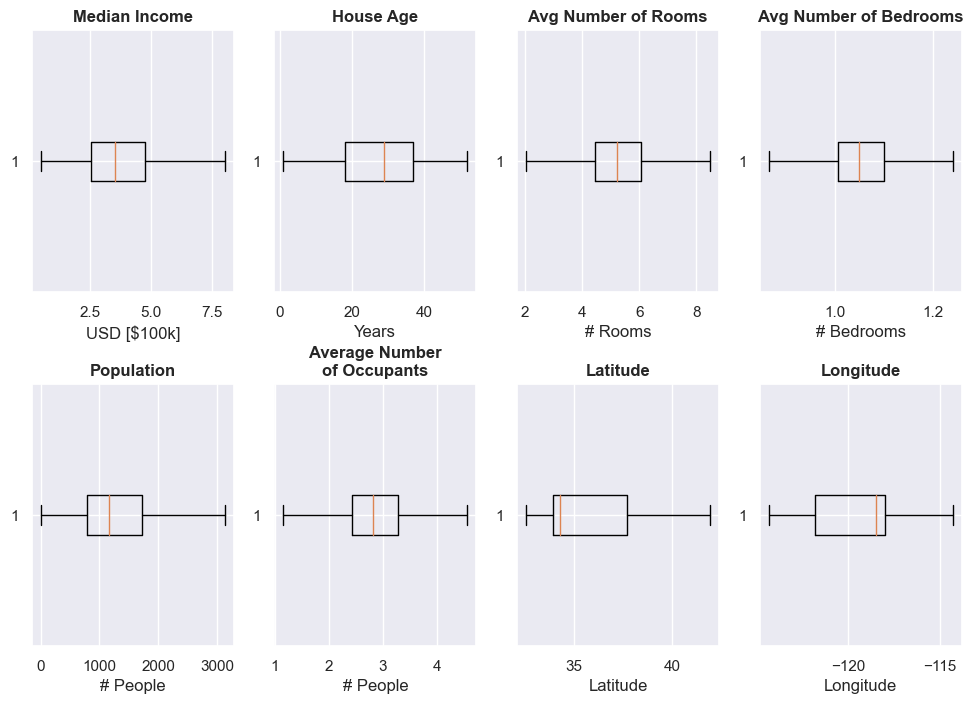

In [104]:
fig, ax = plt.subplots(2,4, sharey=False, figsize=(12,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

ax[0, 0].boxplot(X['MedInc'], showfliers=False, vert=False)
ax[0, 0].set_title('Median Income', weight='bold')
ax[0, 0].set_xlabel('USD [$100k]')

ax[0, 1].boxplot(X['HouseAge'], showfliers=False, vert=False)
ax[0, 1].set_title('House Age', weight='bold')
ax[0, 1].set_ylabel('')
ax[0, 1].set_xlabel('Years')

ax[0, 2].boxplot(X['AveRooms'], showfliers=False, vert=False)
ax[0, 2].set_title('Avg Number of Rooms', weight='bold')
ax[0, 2].set_ylabel('')
ax[0, 2].set_xlabel('# Rooms')

ax[0, 3].boxplot(X['AveBedrms'], showfliers=False, vert=False)
ax[0, 3].set_title('Avg Number of Bedrooms', weight='bold')
ax[0, 3].set_ylabel('')
ax[0, 3].set_xlabel('# Bedrooms')

ax[1, 0].boxplot(X['Population'], showfliers=False, vert=False)
ax[1, 0].set_title('Population', weight='bold')
ax[1, 0].set_xlabel('# People')

ax[1, 1].boxplot(X['AveOccup'], showfliers=False, vert=False)
ax[1, 1].set_title('Average Number\nof Occupants', weight='bold')
ax[1, 1].set_ylabel('')
ax[1, 1].set_xlabel('# People')

ax[1, 2].boxplot(X['Latitude'], showfliers=False, vert=False)
ax[1, 2].set_title('Latitude', weight='bold')
ax[1, 2].set_ylabel('')
ax[1, 2].set_xlabel('Latitude')

ax[1, 3].boxplot(X['Longitude'], showfliers=False, vert=False)
ax[1, 3].set_title('Longitude', weight='bold')
ax[1, 3].set_xlabel('Longitude')

Text(0.5, 0, 'Price [$100k]')

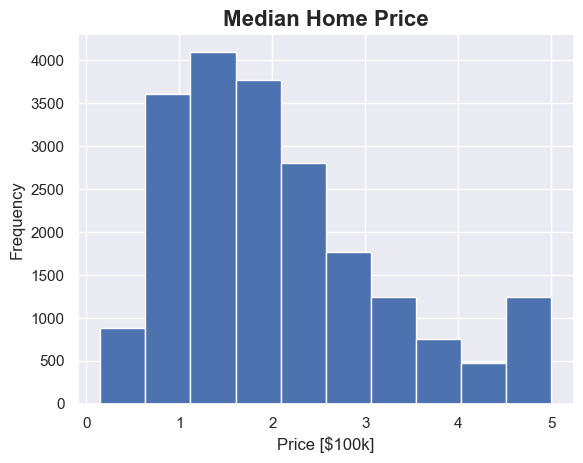

In [55]:
fig, ax = plt.subplots()
ax.hist(y)
ax.set_title('Median Home Price', fontsize=16, weight='bold')
ax.set_ylabel('Frequency')
ax.set_xlabel("Price [$100k]")

<AxesSubplot: >

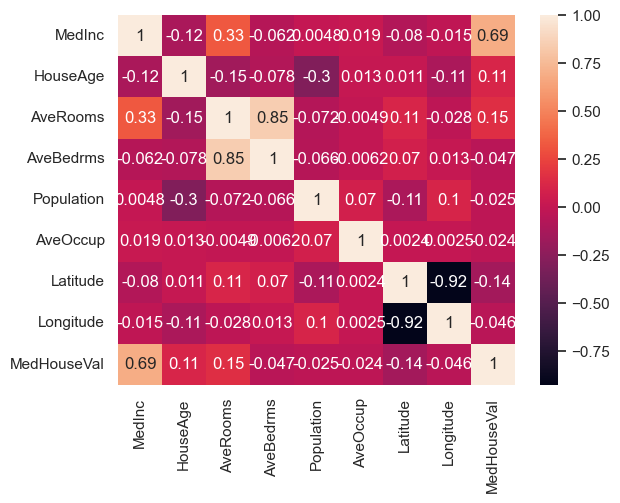

In [64]:
data = pd.concat([X, y], axis=1)
sns.heatmap(data.corr(), annot=True)


# Model Framework

In order to create a model, we perform a few critical steps:
1. Train Test split: we separate our dataset into two sections (sometimes called partitions or cohorts). This lets us build a model on the `train` dataset and evaluate the model on the `test` dataset without cheating. This ensures we're evaluating the model on data it hasn't seen yet, therefore we aren't biasing our results and conclusions.
2. Build a model: we will use sklearn which is a popular statistical machine learning package in Python. In this example, we will start with our classic Linear Regression
3. Evaluate model: to understand the performance of the model, we calculate error metrics like Mean Absolute Error, Mean Absolute Percentage Error, and Mean Squared Error

## Step 1: Partitioning data

In [66]:
from sklearn.model_selection import train_test_split

# first we partition our dataset into a training and testing cohort
# we reserve 25% of our data for testing, and 75% of the data for training
# note we use the random_state to make these cohorts reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
# notice the dataframe looks similar to before, but we have a random selection of rows 
# (15k rows) instead of the full amount (20k rows)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [116]:
# we are trying to predict the home value, so the label is the Median Home Price feature
y_train

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 15480, dtype: float64

## Step 2: Univariate Linear Regression



In [123]:
from sklearn.linear_model import LinearRegression

univar_X_train = pd.DataFrame(X_train['MedInc'])
univar_X_test = pd.DataFrame(X_test['MedInc'])

reg = LinearRegression().fit(X=univar_X_train, y=y_train)

pred = reg.predict(univar_X_test)

## Step 3: Model Evaluation

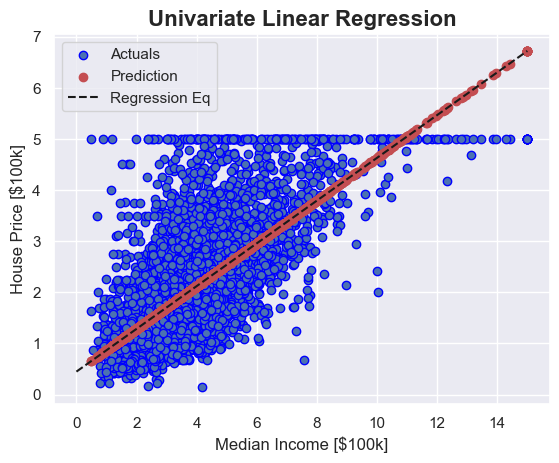

In [124]:
fig, ax = plt.subplots()
ax.scatter(univar_X_test, y_test, edgecolors=(0, 0, 1), label='Actuals')
ax.scatter(univar_X_test, pred, color='r', label='Prediction')
ax.set_xlabel('Median Income [$100k]')
ax.set_ylabel('House Price [$100k]')
ax.set_title('Univariate Linear Regression', fontsize=16, weight='bold')

m = reg.coef_
b = reg.intercept_
x = np.linspace(0, 15, 100)
y = m * x + b

ax.plot(x, y, ls='--', color='k', label='Regression Eq')

ax.legend()

In [125]:
# note you can give an alias on imports to make it easier to call
# I personally like these aliases because "MAE" is much easier to write than "mean_absolute_error"
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE

In [126]:
MAE(y_test, pred), MAPE(y_test, pred), MSE(y_test, pred, squared=False), reg.score(univar_X_test, y_test)

(0.6268970462646626,
 0.38964161845882334,
 0.8367772922523895,
 0.47083837938023365)

At this point, we have a baseline regression with error metrics. These metrics show the model fit isn't _terrible_, but we can certainly improve the model! Let's explore additional feature engineering to improve the model

# Multiple Linear Regression

We can extend the univariate case and analyze how multiple regressors can predict an output.

In [127]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X=X_train, y=y_train)

pred = reg.predict(X_test)

In [129]:
MAE(y_test, pred), MAPE(y_test, pred), MSE(y_test, pred, squared=False), reg.score(X_test, y_test)

(0.5296964012919457,
 0.31978371646123754,
 0.7356145375446766,
 0.5910509795491354)

Text(0, 0.5, 'Coefficient')

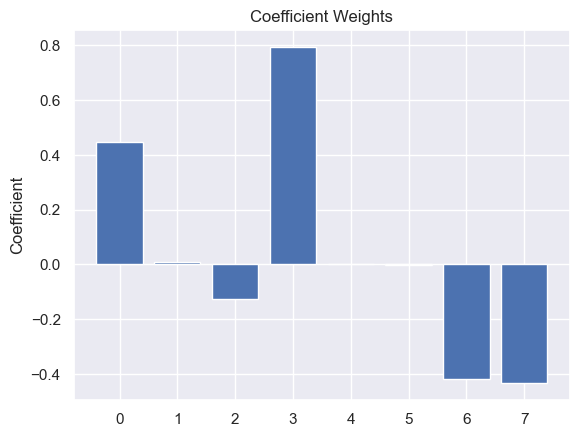

In [137]:
fig, ax = plt.subplots()
ax.bar(range(0, len(reg.coef_)), reg.coef_)
ax.set_title('Coefficient Weights')
ax.set_ylabel('Coefficient Value')
ax.set_xlabel('')